In [3]:
%matplotlib inline
#  disable transparency for gif making
%config InlineBackend.print_figure_kwargs={'facecolor' : "w"}
import os
from glob import glob

import numpy as np
import pandas as pd
idx = pd.IndexSlice
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from matplotlib.ticker import MaxNLocator

import geopandas as gpd

from sklearn.metrics import mean_absolute_error

from sklearn.linear_model import LinearRegression
from sklearn.neural_network import MLPRegressor

import contextily as cx

In [4]:
data_dir = '/cluster/tufts/hugheslab/datasets/NSF_OD/'
svi_dir = os.path.join(data_dir,'SocialVulnerabilityIndex')
result_dir = os.path.join(data_dir, 'results')
mass_shapefile = os.path.join(data_dir,'shapefiles','MA_2021')

In [5]:
svi_file = os.path.join(result_dir,'svi_month')
svi_gdf = gpd.read_file(svi_file)

In [6]:
svi_gdf = svi_gdf.rename(columns={'INTPTLAT':'lat', 'INTPTLON':'lon', 'GEOID':'grid_squar'})
# Make lat and lon floats
svi_gdf.loc[:, 'lat'] = svi_gdf.lat.astype(float)
svi_gdf.loc[:, 'lon'] = svi_gdf.lon.astype(float)
deaths_gdf = svi_gdf

just_grid = deaths_gdf.loc[(deaths_gdf['year']==2000)&(deaths_gdf['month']==4), ['grid_squar','geometry', 'lat', 'lon']]


In [7]:
deaths_gdf = deaths_gdf.fillna(deaths_gdf.mean())
deaths_gdf = deaths_gdf.drop_duplicates(['grid_squar','year','month','deaths'])

KeyboardInterrupt: 

In [8]:
# Make lat and lon floats
deaths_gdf.loc[:, 'lat'] = deaths_gdf.lat.astype(float)
deaths_gdf.loc[:, 'lon'] = deaths_gdf.lon.astype(float)

In [9]:
deaths_gdf = deaths_gdf.set_index(['grid_squar','year','month']).sort_index()

In [10]:
deaths_gdf.deaths.max()

8.0

Text(0.5, 1.0, "Monthly Deaths: 95.16% 0's, 4.59% 1's")

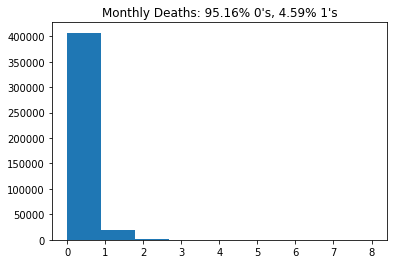

In [11]:
counts,_,_ = plt.hist(deaths_gdf['deaths'], bins=int(deaths_gdf.deaths.max()+1))
plt.title(f"Monthly Deaths: {counts[0]/sum(counts)*100:.2f}% 0's, {counts[1]/sum(counts)*100:.2f}% 1's")

In [12]:
timestep = 0

for year in range(2000, 2021+1):
    for month in range(1, 12+1):
        deaths_gdf.loc[idx[:,year, month], 'timestep'] = timestep
        timestep+=1
        


In [13]:
deaths_gdf = deaths_gdf.reset_index().set_index(['grid_squar', 'timestep'])
min_timestep = 0
max_timestep = 263

In [14]:
deaths_through_2010 = deaths_gdf.loc[idx[:,:131],:]

In [15]:
deaths_through_2010


year  month STATEFP COUNTYFP TRACTCE     NAME  \
grid_squar  timestep                                                  
25001010100 0.0       2000      1      25      001   10100      101   
            1.0       2000      2      25      001   10100      101   
            2.0       2000      3      25      001   10100      101   
            3.0       2000      4      25      001   10100      101   
            4.0       2000      5      25      001   10100      101   
...                    ...    ...     ...      ...     ...      ...   
25027761402 127.0     2010      8      25      027  761402  7614.02   
            128.0     2010      9      25      027  761402  7614.02   
            129.0     2010     10      25      027  761402  7614.02   
            130.0     2010     11      25      027  761402  7614.02   
            131.0     2010     12      25      027  761402  7614.02   

                                  NAMELSAD  MTFCC FUNCSTAT     ALAND  ...  \
grid_squar  timestep                                                  ...   
25001010100 0.0           Census Tract 101  G5020        S  25046216  ...   
            1.0           Census Tract 101  G5020        S  25046216  ...   
            2.0           Census Tract 101  G5020        S  25046216  ...   
            3.0           Census Tract 101  G5020        S  25046216  ...   
            4.0           Census Tract 101  G5020        S  25046216  ...   
...                                    ...    ...      ...       ...  ...   
25027761402 127.0     Census Tract 7614.02  G5020        S  25568170  ...   
            128.0     Census Tract 7614.02  G5020        S  25568170  ...   
            129.0     Census Tract 7614.02  G5020        S  25568170  ...   
            130.0     Census Tract 7614.02  G5020        S  25568170  ...   
            131.0     Census Tract 7614.02  G5020        S  25568170  ...   

                      theme_1_pc  theme_2_pc  theme_3_pc  theme_4_pc  \
grid_squar  timestep                                                   
25001010100 0.0           0.7270      0.2972      0.5268      0.6872   
            1.0           0.7270      0.2972      0.5268      0.6872   
            2.0           0.7270      0.2972      0.5268      0.6872   
            3.0           0.7270      0.2972      0.5268      0.6872   
            4.0           0.7270      0.2972      0.5268      0.6872   
...                          ...         ...         ...         ...   
25027761402 127.0         0.2763      0.1430      0.4570      0.3040   
            128.0         0.2763      0.1430      0.4570      0.3040   
            129.0         0.2763      0.1430      0.4570      0.3040   
            130.0         0.2763      0.1430      0.4570      0.3040   
            131.0         0.2763      0.1430      0.4570      0.3040   

                      svi_pctile         FIPS  ROUNDED_TR  ROUNDED__1  \
grid_squar  timestep                                                    
25001010100 0.0           0.6230  25001010100        None        None   
            1.0           0.6230  25001010100        None        None   
            2.0           0.6230  25001010100        None        None   
            3.0           0.6230  25001010100        None        None   
            4.0           0.6230  25001010100        None        None   
...                          ...          ...         ...         ...   
25027761402 127.0         0.2291         None      761400      761400   
            128.0         0.2291         None      761400      761400   
            129.0         0.2291         None      761400      761400   
            130.0         0.2291         None      761400      761400   
            131.0         0.2291         None      761400      761400   

                      TRACTCE_y  \
grid_squar  timestep              
25001010100 0.0            None   
            1.0            None   
            2.0            None   
            3.0            None   

In [16]:
biggest_diff = 0
least_sparsity=1
season_length=6

max_timestep = 263
deaths_to_use = deaths_gdf

for season_start in [7]:

    curr_start = 0 
    curr_season=0
    season_name='one'
    deaths_to_use.loc[idx[:, curr_start:curr_start+season_length-1], 'season'] = curr_season
    deaths_to_use.loc[idx[:, curr_start:curr_start+season_length-1], 'season_name'] = season_name
    
    curr_start = season_start - 1
    curr_season=1
    season_name='two'
    
    while curr_start <= max_timestep:
        deaths_to_use.loc[idx[:, curr_start:curr_start+season_length-1], 'season'] = curr_season
        deaths_to_use.loc[idx[:, curr_start:curr_start+season_length-1], 'season_name'] = season_name
        curr_season+=1
        curr_start = curr_start + season_length
        if season_name=='one':
            season_name='two'
        else:
            season_name='one'
            
            
    gap = deaths_to_use.reset_index().groupby('season_name').sum()['deaths'].diff()[-1]
    if np.abs(gap) > biggest_diff:
        biggest_diff = np.abs(gap)
        biggest_gap_start = season_start
        
    sparsity = deaths_to_use.reset_index().groupby('deaths').count()['grid_squar']
    num_0s = sparsity.loc[0]
    sparsity = num_0s/len(deaths_to_use)
    if sparsity < least_sparsity:
        least_sparsity = sparsity
        least_sparse_start= season_start
        

        
        
    

In [17]:
biggest_gap_start

7

In [18]:
least_sparse_start

7

In [19]:
biggest_gap_start

7

In [20]:
biggest_diff

36.0

In [21]:
deaths_to_use.reset_index().groupby('season_name').sum()['deaths']

season_name
one    10947.0
two    10911.0
Name: deaths, dtype: float64

In [22]:
deaths_gdf.reset_index().groupby('season_name').sum()['deaths']

season_name
one    10947.0
two    10911.0
Name: deaths, dtype: float64

Text(0.5, 1.0, "Bi-Annual Deaths: 76.68% 0's, 17.78% 1's")

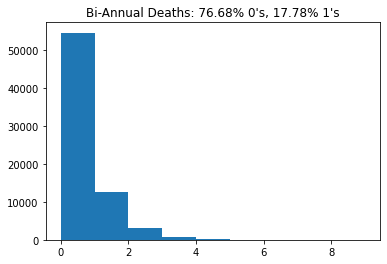

In [23]:
counts,_,_ = plt.hist(deaths_to_use.reset_index().groupby(['grid_squar','season']).sum()['deaths'], bins=int(deaths_to_use['deaths'].max()+1))
plt.title(f"Bi-Annual Deaths: {counts[0]/sum(counts)*100:.2f}% 0's, {counts[1]/sum(counts)*100:.2f}% 1's")

Text(0.5, 1.0, "Quarterly Deaths: 76.68% 0's, 17.78% 1's")

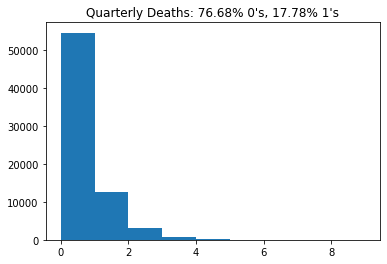

In [24]:
counts,_,_ = plt.hist(deaths_to_use.reset_index().groupby(['grid_squar','season']).sum()['deaths'], bins=int(deaths_to_use['deaths'].max()+1))
plt.title(f"Quarterly Deaths: {counts[0]/sum(counts)*100:.2f}% 0's, {counts[1]/sum(counts)*100:.2f}% 1's")

In [191]:
svi_file = os.path.join(result_dir,'svi_biannual')
gpd.GeoDataFrame(deaths_gdf.reset_index()).to_file(svi_file)

/cluster/tufts/hugheslab/kheuto01/miniconda3/envs/zigp_36/lib/python3.6/site-packages/ipykernel_launcher.py:2: UserWarning: Column names longer than 10 characters will be truncated when saved to ESRI Shapefile.
  
